# MNIST Enhancements
For this notebook, the goal is to provide a number of improvements to the Neural Network defined in the MNIST Vanilla notebook; this is to refamiliarize us with the following topics:

* ReLU (and other) Activation Functions
* Cross Entropy & Softmax Cost Functions
* Regularization Techniques (L1, L2, Dropout)
* Learning Rate Algorithms (TBD)

## Getting Started
With some small modifications to the Network class defined in the MNIST Vanilla notebook, we can now import all of our previous work. See the following files in the **libs** folder to examine the changes; primarily, the changes allow us to supply different activation functions and cost functions for the network. It should be noted that different layers in a neural network can (and often do) have different activation functions, but to keep the scope from getting out of hand, we simply define one activation function for the entire network.

### Import Necessary Libraries
Nothing too surprising here. We load the **network** python file mentioned above, provide some Jupyter configuration, and reload the MNIST dataset

In [1]:
import sys
sys.path.append('/notebooks/projects/MNIST/libs')  # Jupyter import fix
import numpy as np
import network
import network_ce
import matplotlib.pyplot as plt
%matplotlib inline

# Reload the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Verify It Works
Here, we'll define and train another network, just like at the end of the last notebook. *Note the new keyword arguments specifying the test data & labels*

In [2]:
deep_network = network.Network(784,100,20,10)
mse_cost = deep_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=30, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

0.449938713722 1135 / 10000
0.450004776538 1135 / 10000
0.45008476408 1135 / 10000
0.449920721487 1028 / 10000
0.449876443208 1135 / 10000
0.450058552004 1010 / 10000
0.44991315589 1135 / 10000
0.449860315857 1009 / 10000
0.449916362918 1010 / 10000
0.449785286083 1655 / 10000
0.449831515056 1135 / 10000
0.449667517485 1184 / 10000
0.449590735982 1135 / 10000
0.449578427804 1028 / 10000
0.449221463033 1211 / 10000
0.448219330957 1135 / 10000
0.435750423858 2100 / 10000
0.401794430208 2374 / 10000
0.381413344612 2911 / 10000
0.367067662101 3157 / 10000
0.360327818089 3226 / 10000
0.35714375934 3336 / 10000
0.35468240535 3371 / 10000
0.352070548527 3704 / 10000
0.345480131003 4074 / 10000
0.328766969065 4201 / 10000
0.313357515737 4975 / 10000
0.293244309191 5497 / 10000
0.268755509374 6093 / 10000
0.246307733982 6585 / 10000


# ReLU
For fully-connected layers in a network, ReLU has become the current gold-standard, due to its simplicity and efficiency. Many variants of it now exist, but we'll keep it simple for now. ReLU is wonderful not only because it's simple, but because its derivative is constant, meaning that gradient descent doesn't slow down with larger networks (no sigmoid derivative, which we'll see again with Cross Entropy next).

In [2]:
def relu(z):
    return np.maximum(0, z)  # For each element, return 0 if z[i] <= 0, else return z[i]

def relu_prime(z):  # Similar to above, but return 1 if z[i] > 0 instead of z
    out = np.copy(z)
    out[out<=0] = 0
    out[out>0] = 1
    return out

## Define the Activation
To use ReLU in our network, we simply define an Activation object and supply it when defining our Network object. 

*Note*: To support future changes to the cost function, along with many other reasons not listed here, it's better to define activations for each layer, so you can support multiple activation fuctions in one network (e.g. need the output layer to be sigmoid or softmax, while the rest can be ReLU)

In [3]:
from activations import Activation
ReLU = Activation(relu, relu_prime)

# Test and verify that the activation and derivations are working as expected
rand = np.random.randn(3, 3)
print('Test Matrix:\n',rand)
print('ReLU:\n',ReLU.activate(rand))
print('ReLU Derivative:\n',ReLU.derive(rand))

Test Matrix:
 [[ 0.8802403  -1.04568278 -0.69545569]
 [-1.11751692 -1.69179765 -1.54418889]
 [ 1.03359972 -0.97323583 -0.88230073]]
ReLU:
 [[ 0.8802403   0.          0.        ]
 [ 0.          0.          0.        ]
 [ 1.03359972  0.          0.        ]]
ReLU Derivative:
 [[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]


Now, define the network object:

In [20]:
relu_network = network.Network(784,100,20,10, activation=ReLU)

And train. Note the *much* lower **learning_rate** parameter. An issue that crops up with using ReLU is exploding gradients. This issue can be mitigated a number of ways, such as regularization, or using leaky ReLU (not explored here). Run this multiple times (or incrase the epochs parameter) to perform additional training. 

The highest classification accuracy I've seen so far at this point is **97.45%**

In [21]:
relu_cost = relu_network.train(mnist.train.images, mnist.train.labels, learning_rate=0.1, batch_size=200, epochs=30, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

0.449261615808 1996 / 10000
0.424484515185 2525 / 10000
0.391072403709 3088 / 10000
0.319407977312 5212 / 10000
0.269073550303 6211 / 10000
0.19154217006 7848 / 10000
0.135884437154 8532 / 10000
0.110875146188 8778 / 10000
0.100777488912 8890 / 10000
0.0917895476667 8989 / 10000
0.0831886436585 9055 / 10000
0.0779206516088 9123 / 10000
0.0733803624644 9180 / 10000
0.0694462020125 9253 / 10000
0.0645031376879 9291 / 10000
0.0619360541958 9325 / 10000
0.057943893634 9362 / 10000
0.0562425494184 9372 / 10000
0.052816463237 9408 / 10000
0.0511803559387 9428 / 10000
0.0491573590276 9456 / 10000
0.0480760823275 9470 / 10000
0.0465719196565 9492 / 10000
0.0442777240967 9502 / 10000
0.0434457226896 9516 / 10000
0.0419078236884 9524 / 10000
0.0410513258785 9537 / 10000
0.0394361814056 9546 / 10000
0.038414585173 9557 / 10000
0.0383006627675 9557 / 10000


Interestingly, it doesn't seem to be converging to the 97% accuracy as quickly, though classification accuracy increases much earlier and each epoch executes faster. Occasionally, the network can get "stuck" and not be able to update the cost at all; one possibility is due to "dead" neurons.

# Cross Entropy
An alternative cost function to Mean Squared Error
## What it does
With MSE, when an error is very wrong, it can take a long time to "get the ball rolling"; that is, it can take a long time for efficient learning to occur. By taking advantage of a couple assumptions, it can reduce training time significantly. It does so by removing the sigmoid derivative from the error calculation, which is the source of the slowdown (i.e. when the network is very wrong, the sigmoid derivative becomes very small which slows training)
## Assumptions
There are two primary requirements/assumptions
* We're solving a classification problem (e.g. output should be 0 or 1)
* Our output layer has a sigmoid activation function

## The Code
We won't redefine the entire training function here; however, the cost function looks like this:

In [4]:
def cross_entropy_cost(y, y_pred):
    ce = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    return - np.sum(ce) / len(ce)

def cross_entropy_cost_prime(y, y_pred, hidden_a=None):
    return y_pred - y

And the relevant change to the training function looks like this:  

`dL = self.cost.calculate_derivative(lbls, a[-1])  # Cross Entropy doesn't have hadamard product`  

Everything else remains the same! Let's see how our network performs with the new cost function

In [5]:
ce_network = network_ce.NetworkCE(784,100,20,10)
ce_cost = ce_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=30, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)


2.78328000815 2365 / 10000
2.46864705338 3788 / 10000
1.31713555901 7865 / 10000
0.70418618497 8951 / 10000
0.541301299143 9170 / 10000
0.438457207434 9340 / 10000
0.376307095526 9421 / 10000
0.346746279997 9434 / 10000
0.282034490969 9548 / 10000
0.24950690623 9562 / 10000
0.230024145973 9594 / 10000
0.199669853296 9635 / 10000
0.181453455956 9643 / 10000
0.166078375782 9657 / 10000
0.152823821165 9686 / 10000
0.134013213441 9694 / 10000
0.132603266252 9684 / 10000
0.11283166887 9715 / 10000
0.102924429617 9731 / 10000
0.0959195660959 9726 / 10000
0.0965300604795 9708 / 10000
0.0885165105117 9727 / 10000
0.091829742578 9704 / 10000
0.0897304605907 9719 / 10000
0.0776251886347 9727 / 10000
0.0696165157511 9726 / 10000
0.0599952029735 9739 / 10000
0.0566874964627 9749 / 10000
0.0536663470215 9738 / 10000
0.052487225282 9738 / 10000


## Results
With everything else held constant--network shape, activation functions, learning rate--it's obvious the benefit that cross entropy provides to the speed at which our network learns. 

*Note*: Really, just the shape of this plot matters. Notice how long it takes for MSE to begin significantly decreasing as opposed to Cross Entropy. Even though MSE cost starts at *only* 0.44, it's incomparable to Cross Entropy--in fact, at cost = 0.45, Cross Entropy was already correctly classifying 93% of images, whereas MSE hadn't figured anything out yet! 

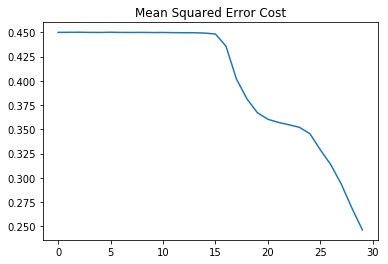

In [24]:
plt.title('Mean Squared Error Cost')
plt.plot(mse_cost)

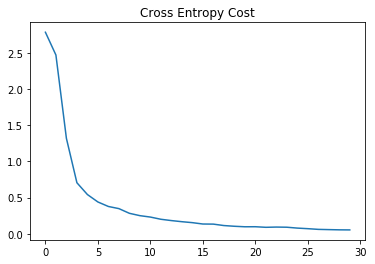

In [6]:
plt.title('Cross Entropy Cost')
plt.plot(ce_cost)

# Softmax Activation and Cost
Softmax (aka Log Likelihood) allows our network to represent its output as a probability distribution--that is, summing all outputs for a single sample will equal 1. This can **only be used for disjoint categories/classes** (e.g. if an image can be classified as a cat *and* an animal, softmax won't work).

## A Note About Vectorization
Softmax definitions typically are written with respect to a single sample. In this case, we wish to vectorize it to work on the entire mini-batch. To that end, the numpy max function is used to reduce all z values to prevent softmax from exploding and giving us NaN/inf errors; for both the max function and the summation, the axis must be set and the result must keep the original dimensions. By doing this, the functions will operate **per sample**, giving us the maximum value in a sample and summing the outputs of all nodes **in each given sample**. 

## Activation Function
To use Softmax, change the activation function of *just* the output layer to the softmax function below (we won't bother defining the derivative, as it's not needed):

In [5]:
from activations import Activation
from cost import Cost
def softmax(z):
    stable_z = z - np.max(z,axis=-1,keepdims=True)
    z_exp = np.exp(stable_z)
    return z_exp / np.sum(z_exp, axis=-1, keepdims=True)
    #exp_max = np.exp(z - np.max(z,axis=-1,keepdims=True))
    #out = exp_max/np.sum(exp_max,axis=-1,keepdims=True)
    #return out

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

sigmoid_activation = Activation(sigmoid, sigmoid_prime)
softmax_activation = Activation(softmax, None)

softmax_activations = [sigmoid_activation, sigmoid_activation, softmax_activation]
sigmoid_activations = [sigmoid_activation, sigmoid_activation, sigmoid_activation]
relu_ce_activations = [ReLU, ReLU, sigmoid_activation]

## Cost Function
The cost function used with Softmax is the Log-Likelihood function; the derivative becomes the same as the MSE and CE derivatives:

In [6]:
def softmax_cost(y, y_pred):
    return - np.sum(np.max(np.log(y_pred),axis=-1, keepdims=True)) / len(y_pred)

def softmax_cost_prime(y, y_pred):
    return y_pred - y


## Testing it out
We can now build our network, making sure to use the softmax activation function in the output layer. 

In [35]:
softmax_network = network_ce.NetworkCE(784,100,20,10, activations=activations, cost=Cost(softmax_cost, softmax_cost_prime))
softmax_cost = softmax_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=10, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

1.61548051854 2900 / 10000
1.27019039702 3925 / 10000
0.727274749864 6445 / 10000
0.27409862435 8739 / 10000
0.151240637365 9074 / 10000
0.123068221757 9230 / 10000
0.111591531984 9313 / 10000
0.0893225397966 9425 / 10000
0.0817987090895 9435 / 10000
0.0713832624137 9527 / 10000


The results seem to line up well with what we had when using Cross Entropy, so we'll just keep this one tucked in our toolbelt, ready if necessary.

# Regularization
The following regularization will be explored:  
* L2 
* L1
* Dropout  

L1/L2 regularization operate simply and similarly: they introduce **weight decay**; L1 pulls the weights toward zero (reduces them by a constant amount) and L2 scales the weights down (e.g. each training pass multiplies the weights by something like 95%). They can be used individually or together.

Dropout works entirely differently. When training, dropout randomly sets the output to zero for a percentage of the neurons. During backpropagation, we need to then nullify the activation (and gradient) for those neurons. During testing, dropout should not be used; instead, the outputs of the neurons should be scaled down. In this way, we're kind of creating many networks in one and choosing the output of the most likely solution. 

 ## L2 Regularization
 For both L2 and L1 regularization, we add a new term to the cost function being used; however, it is the same regardless of which cost function is used, so we'll add it to our training.
 
 
 `# Add L2 Cost to Cost Function
l2_cost = np.sum(self.W**2) * l2_lambda / (2 * len(a))
training_cost.append(self.cost.calculate(labels, a[-1]) + l2_cost`

And update the derivative:

`l2_loss = (1 - learning_rate * l2_lambda / batch_size)
for j in range(len(self.W)):
    self.W[j] = l2_loss * self.W[j] - learning_rate * dWl[j]
    self.B[j] -= (learning_rate / batch_size) * dBl[j]`  
    
To utilize it, we simply declare a non-zero **l2_lambda** when training:

In [45]:
l2_network = network_ce.NetworkCE(784,100,20,10, activations=sigmoid_activations, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime))
l2_cost = l2_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=10, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels, l2_lambda=0.001)

2.75622685764 2736 / 10000
2.37038414581 4128 / 10000
1.21063239315 8375 / 10000
0.779938486485 9001 / 10000
0.655980126625 9228 / 10000
0.597281540245 9330 / 10000
0.541331280963 9451 / 10000
0.513168840312 9516 / 10000
0.500257502084 9547 / 10000
0.482657270057 9584 / 10000


Not explicitly shown above is that a properly tuned regularizer should reduce the gap between training error and testing error, indicating that overfitting is being mitigated.  

Note: softmax (or any other cost function) is **not** a requirement for using L2 or L1 regularization

## L1 Regularization
Similar to L2, L1 gets added in like so:  

Cost:  
`l1_cost = l1_lambda * np.sum([np.sum(np.abs(w)) for w in self.W]) / len(a)
training_cost.append(self.cost.calculate(labels, a[-1]) + l2_cost + l1_cost)`  

Derivative:  
`l1_loss = - learning_rate * l1_lambda / batch_size
for j in range(len(self.W)):
    self.W[j] = l2_loss * self.W[j] + l1_loss * np.sign(self.W[j]) - (learning_rate / batch_size) * dWl[j]
    self.B[j] -= (learning_rate / batch_size) * dBl[j]`  

Using L1 regularization also requires us to set a non-zero **l1_lambda** when training:

In [46]:
l1_network = network_ce.NetworkCE(784,100,20,10, activations=sigmoid_activations, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime))
l1_cost = l1_network.train(mnist.train.images, mnist.train.labels, learning_rate=1.0, batch_size=200, epochs=10, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels, l1_lambda=0.001)


3.03253747912 3007 / 10000
2.59197193035 5728 / 10000
1.68352205786 8547 / 10000
1.48133763816 9049 / 10000
1.44162962307 9245 / 10000
1.43409739688 9355 / 10000
1.44730373898 9423 / 10000
1.44986296247 9502 / 10000
1.46356499031 9565 / 10000
1.47929685154 9602 / 10000


A simple sanity test that L1/L2 is working as expected could be to set the lambda to a high value and see if the sum of the weights is close to zero; without regularization, this tends to happen less often (not to say it couldn't happen).

**Note**: Nothing stops us from suing both L1 and L2 at the same time. Simply set both lambdas to a positive value

## Dropout
Vastly different from L1 & L2, Dropout requires that a random number of neurons have their activations set to zero. To do so, we'll simply use a flag for enabling it, which will drop 20% of the input data and 50% of each hidden layer's activations*.  

First, we need a way to make the *mask*, a matrix of 1s with percentage p of its elements set to 0:

***Note**: A more robust implementation of Dropout would allow you to tune the dropout probability, but for demonstration purposes, we'll use the values defined above; these values are used in the original paper describing Dropout and can be found at https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf .


In [7]:
def dropout_mask(shape, threshold=0.5):
    assert len(shape) == 2
    mask = np.random.rand(shape[0], shape[1])
    mask[mask<threshold] = 0
    mask[mask!=0] = 1
    return mask

mask = dropout_mask((3, 5))
a = np.random.rand(3, 5)
print('Mask:\n',mask)
print('Activations:\n',np.multiply(mask, a))

Mask:
 [[ 0.  0.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.]]
Activations:
 [[ 0.          0.          0.89142373  0.82473641  0.        ]
 [ 0.52444076  0.49660583  0.11716395  0.61638921  0.2545052 ]
 [ 0.          0.          0.          0.01224466  0.63090938]]


Next, we'll define a new network class called **DropoutNetwork**. It's based on the previous NetworkCE code, but includes everything necessary to make dropout work. Additionally, the return value from the train() function now returns an array of the cost, training accuracy, and testing accuracy for each epoch:

In [8]:
from misc import shuffle

class DropoutNetwork:
    
    def __init__(self, *layers, activations=None, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime), dropout=True):
        # assert activation is not None
        self.layers = [l for l in layers]
        
        if activations is not None:
            assert len(activations) == len(layers) - 1
            self.activations = [a for a in activations]
        else:
            self.activations = [Activation(sigmoid, sigmoid_prime) for i in range(len(layers) - 1)]
            
        self.W = [np.random.rand(layers[i], layers[i+1]) * 0.001 for i in range(len(layers) - 1)]  
        self.B = [np.random.rand(1, layers[i+1]) for i in range(len(layers) - 1)]  # Input layer doesn't have bias
        
        if dropout:
            self.drop = [0.8] + [0.5 for l in range(len(layers) - 2)] + [1] # 
        else:
            self.drop = [1.0 for l in range(len(layers))]
        self.cost = cost
    
    def feedforward(self, x, test=False):
        masks = []
        output = []
        a = x
        
        if test == False:
            masks += [dropout_mask(x.shape, threshold=1-self.drop[0])]
            a = np.multiply(a, masks[0])
        # Experiment with scaling inputs just as we do with activations
        
        output += [a]
        z_products = []
        
        for b, w, p, activation in zip(self.B, self.W, self.drop[1:], self.activations):
            if test == False:  # Only scale activations if we're testing
                p = 1
                
            z = np.dot(a, w) + b
            a = p * activation.activate(z)
            if test == False:
                masks += [dropout_mask(z.shape, threshold=1-p)]
                output.append(np.multiply(a, masks[-1]))
            else:
                output.append(a)
            z_products.append(z)
        return output, z_products, masks

    def train(self, images, labels, batch_size=200, learning_rate=0.01, epochs=10, test_epoch=5, test_images=None, test_labels=None, l2_lambda=0, l1_lambda=0):
        assert len(images) == len(labels)
        training_cost = []
        output = []
        for i in range(epochs):
            shuffle(images, labels)
            # Divide training data into batches
            img_batches = [images[i:i+batch_size] for i in range(0, len(images), batch_size)]
            label_batches = [labels[i:i+batch_size] for i in range(0, len(labels), batch_size)]
            n_batches = len(img_batches)


            for imgs, lbls in zip(img_batches, label_batches):
                a, z, masks = self.feedforward(imgs)

                # Calculate Output Error
                # dL = np.multiply(self.cost.calculate_derivative(lbls, a[-1]),self.activations[-1].derive(z[-1]))  # MSE Cost Error
                l2_loss = (1 - learning_rate * l2_lambda / batch_size)
                l1_loss = - learning_rate * l1_lambda / batch_size
                dL = self.cost.calculate_derivative(lbls, a[-1])  # Cross Entropy doesn't have hadamard product  # CE Cost Error
                # Update biases and weights for output layer using output error
                dBL = np.reshape(np.sum(dL, axis=0), (1,dL.shape[1]))
                dWL = np.dot(a[-2].T, dL)
                # Being verbose to show that we're building a list of deltas for each layer in the network (excluding input layer)
                dBl = [dBL]
                dWl = [dWL]
                dl = dL
                
                # Calculate Hidden Error
                for l in range(len(a) - 2, 0, -1):  # -1 for zero-indexing, -1 more because output layer already calculated
                    dl = np.multiply(np.dot(dl, self.W[l].T), np.multiply(self.activations[l-1].derive(z[l-1]), masks[l]))
                    dBl.insert(0, np.reshape(np.sum(dl, axis=0), (1, dl.shape[1])))
                    dWl.insert(0, np.dot(a[l-1].T, dl))

                # Update weights and biases
                for j in range(len(self.W)):
                    self.W[j] = l2_loss * self.W[j] + l1_loss * np.sign(self.W[j]) - (learning_rate / batch_size) * dWl[j]
                    self.B[j] -= (learning_rate / batch_size) * dBl[j]


            # Cost after training this epoch
            a, z, masks = self.feedforward(images, test=True)
            l2_cost = np.sum([np.sum(w ** 2) for w in self.W]) * l2_lambda / (2 * len(a))
            l1_cost = l1_lambda * np.sum([np.sum(np.abs(w)) for w in self.W]) / len(a)
            training_cost.append(self.cost.calculate(labels, a[-1]) + l2_cost + l1_cost)
            result = [training_cost[-1]]

            result += [self.test(images, labels) / len(images)]
            if test_images is not None and test_labels is not None and (i + 1) % test_epoch == 0:
                result += [self.test(test_images, test_labels) / len(test_images)]
            else:
                result += [None]
            print(result)
            output.append(result)
        return np.asarray(output)
    
    def test(self, test_images, test_labels):
        img = test_images
        a, z, masks = self.feedforward(img, test=True)
        a[-1].shape
        prediction = np.argmax(a[-1], axis=1)
        truth = np.argmax(test_labels, axis=1)
        result = np.sum([p == i for p, i in zip(prediction, truth)])
        return result


Define the dropout network and begin testing:

In [ ]:
dropout_network = DropoutNetwork(784,100,30,10, activations=relu_ce_activations, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime))
dropout_cost = dropout_network.train(mnist.train.images, mnist.train.labels, learning_rate=0.15, batch_size=100, epochs=20, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

Plot the results. Note the gap between the training data and test data:

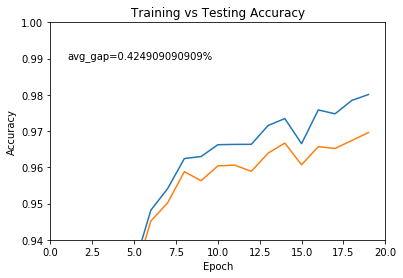

In [67]:
train_accuracy = dropout_cost[:,1]
test_accuracy = dropout_cost[:,2]
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, len(train_accuracy), 0.94, 1])
plt.text(1, 0.99, 'avg_gap=' + str(100 * (np.mean(train_accuracy) - np.mean(test_accuracy))) + '%')
plt.plot(train_accuracy)
plt.plot(test_accuracy)


Again, we'll run the same network without dropout:

In [33]:
boring_network = DropoutNetwork(784,100,30,10, activations=relu_ce_activations, cost=Cost(cross_entropy_cost, cross_entropy_cost_prime), dropout=False)
boring_cost = boring_network.train(mnist.train.images, mnist.train.labels, learning_rate=0.15, batch_size=100, epochs=20, test_epoch=1, test_images=mnist.test.images, test_labels=mnist.test.labels)

[2.6665149366954668, 0.31109090909090908, 0.31319999999999998]
[0.74491553334579363, 0.88307272727272723, 0.88580000000000003]
[0.40774553422316701, 0.93529090909090906, 0.93320000000000003]
[0.2986906243125303, 0.95247272727272725, 0.94869999999999999]
[0.22543230958295427, 0.96474545454545457, 0.95830000000000004]
[0.18034890087021369, 0.97312727272727273, 0.96419999999999995]
[0.15839874783100144, 0.9762909090909091, 0.96799999999999997]
[0.13671335632303303, 0.98056363636363642, 0.97109999999999996]
[0.1229438287319303, 0.98270909090909087, 0.97450000000000003]
[0.10910606942896051, 0.98465454545454545, 0.97350000000000003]
[0.098548900037750367, 0.98672727272727268, 0.97560000000000002]
[0.080973144077585033, 0.98967272727272726, 0.97650000000000003]
[0.081988175412106581, 0.98918181818181816, 0.97660000000000002]
[0.070730168717738642, 0.99107272727272733, 0.97719999999999996]
[0.067510224899544655, 0.99180000000000001, 0.97560000000000002]
[0.057942132092294145, 0.99269090909090

And plot the results, noting the gap:

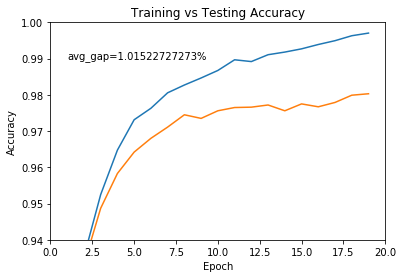

In [66]:
train_accuracy = boring_cost[:,1]
test_accuracy = boring_cost[:,2]
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.text(1, 0.99, 'avg_gap=' + str(100 * (np.mean(train_accuracy) - np.mean(test_accuracy))) + '%')
plt.axis([0, len(train_accuracy), 0.94, 1])
plt.plot(train_accuracy)
plt.plot(test_accuracy)


The main takeaway from this example is that without regularization (through dropout, in this case), the accuracy of the training classification pushes toward 100% while the testing accuracy tapers off. With regularization, the gap between the two decreases and helps ensure that improvements in training classification carry over to the testing classification (i.e. the network isn't just memorizing the training set)

# Additional Notes
Bear in mind, much of what's implemented in the previous notebook and this one are quick and dirty implementations. While I've tried to ensure that everything is robust, there are almost certainly some issues with the code and a million ways it could be improved (e.g. the train() method should most definitely be split into multiple methods, the test method could be a standalone function, etc). However, the basic ideas discussed should be apparent. 

All of this is simply intended to be a review of basic deep learning principles. If you spot anything blatantly wrong with what's presented here, please let me know! My goal is to better understand everything foundational about machine learning

Next up, we'll take these basic ideas and implement them in TensorFlow. From there, we'll quickly move on to other network types, such as CNN and LSTM. Time permitting, I'll try to touch on reinforcement learning, generative adversarial networks, and more.